In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#measuring units for length is m
#define the size of the domain
L = 10;
H = 2

del_l = 0.05; #size of CV side

#number of cells in each direction
N_x = int(L/del_l);
N_y = int(H/del_l);

print(N_x, N_y)

200 40


In [2]:
#define the arrays for the scalar CV
#define arrays for storing velocities in a forward staggered arrangement

scalar_CV = np.zeros((1, N_x*N_y));
vel_u = np.zeros((1, (N_x + 1)*N_y));
vel_v = np.zeros((1, N_x*(N_y + 1))); #needed for completeness

In [3]:
#define the velocity field

#v_velocity field is 0

#u velocity field is a linear field from u_0 - first cell- to 0 - last cell -

u_0 = 1;
profile_u_1D = np.linspace(u_0, 0, (N_x +1));

for i in range(0, N_x):
    a = i*N_y;
    b = a + N_y;
    vel_u[0, a:b] = profile_u_1D[i];

[1.    0.995 0.99  0.985 0.98  0.975 0.97  0.965 0.96  0.955 0.95  0.945
 0.94  0.935 0.93  0.925 0.92  0.915 0.91  0.905 0.9   0.895 0.89  0.885
 0.88  0.875 0.87  0.865 0.86  0.855 0.85  0.845 0.84  0.835 0.83  0.825
 0.82  0.815 0.81  0.805 0.8   0.795 0.79  0.785 0.78  0.775 0.77  0.765
 0.76  0.755 0.75  0.745 0.74  0.735 0.73  0.725 0.72  0.715 0.71  0.705
 0.7   0.695 0.69  0.685 0.68  0.675 0.67  0.665 0.66  0.655 0.65  0.645
 0.64  0.635 0.63  0.625 0.62  0.615 0.61  0.605 0.6   0.595 0.59  0.585
 0.58  0.575 0.57  0.565 0.56  0.555 0.55  0.545 0.54  0.535 0.53  0.525
 0.52  0.515 0.51  0.505 0.5   0.495 0.49  0.485 0.48  0.475 0.47  0.465
 0.46  0.455 0.45  0.445 0.44  0.435 0.43  0.425 0.42  0.415 0.41  0.405
 0.4   0.395 0.39  0.385 0.38  0.375 0.37  0.365 0.36  0.355 0.35  0.345
 0.34  0.335 0.33  0.325 0.32  0.315 0.31  0.305 0.3   0.295 0.29  0.285
 0.28  0.275 0.27  0.265 0.26  0.255 0.25  0.245 0.24  0.235 0.23  0.225
 0.22  0.215 0.21  0.205 0.2   0.195 0.19  0.185 0.

In [4]:
#computation of the fows

rho = 1; #g/cm^3
heat_c = 4.182; #J/gK at 25 deg C
A = del_l**2;

#u-flow
F_u = vel_u*rho*heat_c;
#v-flow
F_v = vel_v*rho*heat_c; #for completeness

#thermal condutivity of water
kappa = 0.589; #W/cmK at 20 deg C
#NB the conductivity is subject to variation with temperature

#diffusive thermal conductance
D = (kappa/del_l);

11.78
[[4.182 4.182 4.182 ... 0.    0.    0.   ]]
[[0. 0. 0. ... 0. 0. 0.]]


In [5]:
#implementation of BC

#inlet and outlet BC for scalar CV 
#the velocity field is alrady given
#ignore pressure variations
mat_1 = np.zeros((1, N_y));
mat_2 = np.zeros((1, N_y));

#inlet temperature
mat_1[0, :] = 10;
inlet_BC = mat_1;
#outlet temperature
mat_2[0, :] = 0;
outlet_BC = mat_2;

#wall BC, constant heat flux out of the domain (J/s)
#heat_F_b = 0.05/A;
#heat_F_t = 0.05/A; #careful with the signs
#these variables will be needed to deal with the source terms

#OR

#bottom and top wall temperature
T_bottom = 0;
T_top = 10;

print(inlet_BC)
print(outlet_BC)

[[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
  10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
  10. 10. 10. 10.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
#DOMAIN CREATION
#matrix construction, we are going to use the formalism of a sparsely occupied matrix
#we use Central Difference for boundary cells
#we use Hybrid scheme for interior cells

#SPARSELY OCCUPIED MATRIX
#each row of the the coefficients matrix contains at most five elements 
#so we can arrange the sparsely occupied fomalism in the following way:
#first column goes the row, from 1 to N_y*N_x (all cells)
#second column goes the column in the matrix, from 1 to 5
#third column goes the coeffcient

#we use if-clauses to contruct the geometry
#next time you can also try the "in" command

sol_mat = np.zeros((N_x*N_y*5, 3));

corners = [0, N_y - 1, (N_x -1)*N_y, N_x*N_y -1];
inlet_cells = np.arange(1, N_y - 1, 1);
outlet_cells = np.arange((N_x -1)*N_y + 1, N_x*N_y -1, 1);
bottom_wall_cells = np.arange(N_y, (N_x -1)*N_y, N_y);
top_wall_cells = np.arange(2*N_y - 1, N_x*N_y - 1, N_y);

#column 0
for N in range(0, N_x*N_y):
    a = N*5;
    b = a + 5;
    sol_mat[a:b, 0] = N; #already the counting system in py

#gross structure of column 1
for M in range(0, N_x*N_y):
    a = M*5;
    
    sol_mat[a, 1] = M - 1; #south
    sol_mat[a + 1, 1] = M - N_y; #west
    sol_mat[a + 2, 1] = M; #P
    sol_mat[a + 3, 1] = M + N_y; #east
    sol_mat[a + 4, 1] = M + 1; #north

for a_x in range(0, N_x):
    for a_y in range(0, N_y):
        cell_P = int(a_x*N_y + a_y);
        
        location_sol_mat = cell_P*5;
        S = location_sol_mat;
        W = S + 1;
        P = S + 2;
        E = S + 3;
        N = S + 4;
        
        if cell_P == 0: #south-west corner
            sol_mat[S, 1] = 0;
            sol_mat[W, 1] = 0;
        elif cell_P == N_y - 1: #north-west corner
            sol_mat[W, 1] = 0;
            sol_mat[N, 1] = 0;
        elif cell_P == (N_x -1)*N_y: #south-east corner
            sol_mat[S, 1] = 0;
            sol_mat[E, 1] = 0;
        elif cell_P == N_x*N_y -1: #north-east corner
            sol_mat[E, 1] = 0;
            sol_mat[N, 1] = 0;
        elif cell_P in inlet_cells:
            sol_mat[W, 1] = 0;
        elif cell_P in outlet_cells:
            sol_mat[E, 1] = 0;
        elif cell_P in bottom_wall_cells:
            sol_mat[S, 1] = 0;
        elif cell_P in top_wall_cells:
            sol_mat[N, 1] = 0;

[0, 39, 7960, 7999]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
[7961 7962 7963 7964 7965 7966 7967 7968 7969 7970 7971 7972 7973 7974
 7975 7976 7977 7978 7979 7980 7981 7982 7983 7984 7985 7986 7987 7988
 7989 7990 7991 7992 7993 7994 7995 7996 7997 7998]
[  40   80  120  160  200  240  280  320  360  400  440  480  520  560
  600  640  680  720  760  800  840  880  920  960 1000 1040 1080 1120
 1160 1200 1240 1280 1320 1360 1400 1440 1480 1520 1560 1600 1640 1680
 1720 1760 1800 1840 1880 1920 1960 2000 2040 2080 2120 2160 2200 2240
 2280 2320 2360 2400 2440 2480 2520 2560 2600 2640 2680 2720 2760 2800
 2840 2880 2920 2960 3000 3040 3080 3120 3160 3200 3240 3280 3320 3360
 3400 3440 3480 3520 3560 3600 3640 3680 3720 3760 3800 3840 3880 3920
 3960 4000 4040 4080 4120 4160 4200 4240 4280 4320 4360 4400 4440 4480
 4520 4560 4600 4640 4680 4720 4760 4800 4840 4880 4920 4960 5000 5040
 5080 5120 5160 5200 5240 5280

In [7]:
#HYBRID SCHEME IMPLEMENTATION
#loop for the calculation of all the other coefficients
#NB: even though we don't have these terms we DO HAVE their fluxes thanks to the staggered arrangement
#the computation process is expained on the paper notes

for t in range(0, N_x*N_y):
    #define enumerators for the cells
    S = t*5;
    W = S + 1;
    P = W + 1;
    E = P + 1;
    N = E + 1;
    
    u_E = t + N_y;
    u_W = t;
    v_S = t;
    v_N = t + 1;
    
    if t == 0: #S-W wall
        sol_mat[S, 2] = 0;
        sol_mat[W, 2] = 0;
        sol_mat[P, 2] = F_u[0, u_E]/2 + F_v[0, v_N]/2 + 6*D; #considering difffusion boundaries, temeprature is applied at all walls
        sol_mat[E, 2] = F_u[0, u_E]/2 - D;
        sol_mat[N, 2] = F_u[0, v_N]/2 - D;
    elif t == N_y - 1: #N-W wall
        sol_mat[S, 2] = - F_v[0, v_S]/2 - D
        sol_mat[W, 2] = 0;
        sol_mat[P, 2] = (F_u[0, u_E]/2 - F_v[0, v_S]/2 + 6*D)
        sol_mat[E, 2] = F_u[0, u_E]/2 - D;
        sol_mat[N, 2] = 0;
    elif t == (N_x -1)*N_y: #S-E wall
        sol_mat[S, 2] = 0;
        sol_mat[W, 2] = - F_u[0, u_W]/2 - D;
        sol_mat[P, 2] = (F_v[0, v_N]/2 - F_u[0, u_W]/2 + 6*D);
        sol_mat[E, 2] = 0;
        sol_mat[N, 2] = F_v[0, v_N]/2 - D;
    elif t == N_x*N_y -1: #N-E wall
        sol_mat[S, 2] = - F_v[0, v_S]/2 - D;
        sol_mat[W, 2] = - F_u[0, u_W]/2 - D;
        sol_mat[P, 2] = (- F_u[0, u_W]/2 - F_v[0, v_S]/2 + 6*D);
        sol_mat[E, 2] = 0;
        sol_mat[N, 2] = 0;
    elif t in inlet_cells: #W-wall
        sol_mat[S, 2] = - F_v[0, v_S]/2 - D;
        sol_mat[W, 2] = 0;
        sol_mat[P, 2] = (F_u[0, u_E]/2 + F_v[0, v_N]/2 - F_v[0, v_S]/2) + 5*D;
        sol_mat[E, 2] = F_u[0, u_E]/2 - D;
        sol_mat[N, 2] = F_v[0, v_N]/2 - D;
    elif t in outlet_cells: #E-wall
        sol_mat[S, 2] = - F_v[0, v_S]/2 - D;
        sol_mat[W, 2] = - F_u[0, u_W]/2 - D;
        sol_mat[P, 2] = (- F_u[0, u_W]/2 - F_v[0, v_N]/2 - F_v[0, v_S]/2) + 5*D;
        sol_mat[E, 2] = 0;
        sol_mat[N, 2] = F_v[0, v_N]/2 - D;
    elif t in bottom_wall_cells: #S-wall
        sol_mat[S, 2] = 0;
        sol_mat[W, 2] = - F_u[0, u_W]/2 - D;
        sol_mat[P, 2] = (F_u[0, u_E]/2 - F_u[0, u_W]/2 + F_v[0, v_N]/2) + 5*D;
        sol_mat[E, 2] = F_u[0, u_E]/2 - D;
        sol_mat[N, 2] = F_v[0, v_N]/2 - D;
    elif t in top_wall_cells: #N-wall
        sol_mat[S, 2] = - F_v[0, v_S]/2 - D;
        sol_mat[W, 2] = - F_u[0, u_W]/2 - D;
        sol_mat[P, 2] = (F_u[0, u_E]/2 - F_u[0, u_W]/2 - - F_v[0, v_S]/2 ) + 5*D;
        sol_mat[E, 2] = F_u[0, u_E]/2 - D;
        sol_mat[N, 2] = 0;

    #interior
    else:
        Pe_u = abs((F_u[0, u_E]+F_u[0, u_W])/(2*D));
        Pe_v = abs((F_v[0, v_N]+F_v[0, v_S])/(2*D));
        alternative_U = (F_u[0, u_E]+F_u[0, u_W])/2;
        alternative_V = (F_v[0, v_N]+F_v[0, v_S])/2;
        if (Pe_u > 2 and Pe_v > 2): #full upwind
            if ((F_u[0, u_E] > 0 and F_v[0, v_N] > 0) or (alternative_U > 0 and alternative_V > 0)):
                a_S = -F_v[0, v_S] - D;
                a_W = -F_u[0, u_W] - D;
                a_E = - D;
                a_N = - D;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S);
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
            elif ((F_u[0, u_E] > 0 and F_v[0, v_N] < 0) or (alternative_U > 0 and alternative_V < 0)):
                a_S = - D;
                a_W = -F_u[0, u_W] - D;
                a_E = - D;
                a_N = F_v[0, v_N] - D ;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
            elif ((F_u[0, u_E] < 0 and F_v[0, v_N] > 0) or (alternative_U < 0 and alternative_V > 0)):
                a_S = -F_v[0, v_S] - D;
                a_W = - D;
                a_E = F_u[0, u_E] - D;
                a_N = - D ;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
            elif ((F_u[0, u_E] < 0 and F_v[0, v_N] < 0) or (alternative_U < 0 and alternative_V < 0)):
                a_S = - D;
                a_W = - D;
                a_E = F_u[0, u_E] - D;
                a_N = F_v[0, v_N] - D ;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
        elif Pe_u > 2 and Pe_v < 2: #upwind only in u-direction
            if F_u[0, u_E] > 0 or alternative_U > 0:
                a_S = -F_v[0, v_S]/2 - D;
                a_W = -F_u[0, u_W] - D;
                a_E = - D;
                a_N = F_v[0, v_N]/2 - D;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
            elif F_u[0, u_E] < 0 or alternative_U < 0:
                a_S = -F_v[0, v_S]/2 - D;
                a_W = - D;
                a_E = F_u[0, u_E] - D;
                a_N = F_v[0, v_N]/2 - D;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
        elif (Pe_u < 2 and Pe_v > 2): #upwind only in v-direction
            if F_v[0, v_N] > 0 or alternative_V > 0:
                a_S = - F_v[0, v_S] - D;
                a_W = -F_u[0, u_W]/2 - D;
                a_E = F_u[0, u_E]/2 - D;
                a_N = - D;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
            elif F_v[0, v_N] < 0 or alternative_V < 0:
                a_S = - D;
                a_W = -F_u[0, u_W]/2 - D;
                a_E =  F_u[0, u_E]/2 - D;
                a_N = F_v[0, v_N] - D;
                a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
                 
                sol_mat[S, 2] = a_S;
                sol_mat[W, 2] = a_W;
                sol_mat[P, 2] = a_P;
                sol_mat[E, 2] = a_E;
                sol_mat[N, 2] = a_N;
        elif (Pe_u < 2 and Pe_v < 2): # full CD
            a_S = -F_v[0, v_S]/2 - D;
            a_W = -F_u[0, u_W]/2 - D;
            a_E = F_u[0, u_E]/2 - D;
            a_N = F_v[0, v_N]/2 - D;
            a_P = (F_u[0, u_E] - F_u[0, u_W] + F_v[0, v_N] - F_v[0, v_S] - a_E - a_N - a_W - a_S );
        
            sol_mat[S, 2] = a_S;
            sol_mat[W, 2] = a_W;
            sol_mat[P, 2] = a_P;
            sol_mat[E, 2] = a_E;
            sol_mat[N, 2] = a_N;

In [8]:
dt = pd.DataFrame(sol_mat);
dt.to_excel("sol_matrix.xlsx")

In [9]:
#SOURCE TERM CREATION
#Convective source and diffusive source
#based on Central Difference

b_source = np.zeros((1, N_x*N_y));

for M in range(0, N_x*N_y):
    a = 0;
    S = M*5;
    W = S + 1;
    E = W + 2;
    N = E + 1;
  
    #attention to the signs and the balance equation in the diffusion side of the equation
    if sol_mat[S, 1] == 0:
        a = 2*D*T_bottom;
    if sol_mat[W, 1] == 0  and M != N_y: #adapted to the problem geometry (since LHS of N_y is cell 0)
        t = int(sol_mat[W, 0]);
        a = a + (F_u[0, M]/2)*inlet_BC[0, t] + 2*D*inlet_BC[0, t];
    if sol_mat[E, 1] == 0:
        t = int(sol_mat[E, 0]) -(N_x - 1)*N_y;
        a = a - (F_u[0, M + N_y]/2)*outlet_BC[0, t] + 2*D*outlet_BC[0, t];
    if sol_mat[N, 1] == 0:
        a = a + 2*D*T_top;
    
    b_source[0, M] = a;

In [10]:
dt = pd.DataFrame(b_source);
dt.to_excel("source_vec.xlsx")

In [11]:
#DEFINE THE CONJUGATE GRADIENT SQUARE SOLVER

def CGS_solver(sol_mat, b_source, guess_0):
    a, b = np.shape(b_source); #size of the system, needed for stopping the algorithm
    columns = int(b);
    
    def matrix_product_5bands(matrix, vector): #specifically for the sparse sol_mat matrix
        rows, columns = np.shape(vector);
        product = np.zeros((1, int(columns))); #list of zeros
        
        for a in range(0, columns):
            t_1 = int(a*5);
            t_2 = int(t_1 +1);
            t_3 = int(t_2 +1);
            t_4 = int(t_3 +1);
            t_5 = int(t_4 +1);
            
            S = int(sol_mat[t_1, 1]);
            W = int(sol_mat[t_2, 1]);
            P = int(sol_mat[t_3, 1]);
            E = int(sol_mat[t_4, 1]);
            N = int(sol_mat[t_5, 1]);
            
            term = sol_mat[t_1, 2]*vector[0, S] + sol_mat[t_2, 2]*vector[0, W] + sol_mat[t_3, 2]*vector[0, P] + sol_mat[t_4, 2]*vector[0, E] + sol_mat[t_5, 2]*vector[0, N];
            
            product[0, a] = term
            
        return product
    
    #initialize with 0th residual
    residual_0 = b_source - matrix_product_5bands(sol_mat, guess_0);
    
    #initialize direction vectors
    dir_vec = residual_0;
    C_dir_vec = residual_0;
    
    #initialize L-2 global residual with residual 0
    trans_residual_0 = residual_0.T;
    R2 = np.sqrt(residual_0.dot(trans_residual_0))
    
    #initialize residual for iteration
    residual = residual_0
    
    #initialize solution
    solution = guess_0
    #this will be solution at 0th iteration
    
    #set tolerance
    tolerance = 10**-5
    #reference to control the convergence
    ref = 200;
    #number of iterations
    iter_N = 0;
    
    while R2 > tolerance:
        
        #alpha^n+1, coefficient needed in solution update
        trans_residual = residual.T;
        alpha = (residual_0.dot(trans_residual))/(residual_0.dot(matrix_product_5bands(sol_mat, dir_vec).T));
        
        #vector needed to update solution and account for a-symmetric nature of the solution, G^n+1
        G_vec = C_dir_vec - alpha*(matrix_product_5bands(sol_mat, dir_vec));
        
        #update the solution
        solution = solution + alpha*(C_dir_vec + G_vec);
        
        #new residual and new global residual
        residual_n_1 = b_source - matrix_product_5bands(sol_mat, solution);
        trans_residual_n_1 = residual_n_1.T
        R2_temporary = np.sqrt(residual_n_1.dot(residual_n_1.T));
        R2 = R2_temporary[0, 0];
        
        #beta^n+1, needed in conjugate direction, search direction vector update
        beta = (residual_0.dot(trans_residual_n_1))/(residual_0.dot(trans_residual));
        
        #update conjugate direction
        C_dir_vec = residual_n_1 + beta*G_vec;
        
        #update search direction
        dir_vec = C_dir_vec + beta*(G_vec + beta*dir_vec);
        
        residual = residual_n_1
        
        print(solution[0, ref], R2, iter_N)
        
        if iter_N == columns:
            break
        
        iter_N = iter_N + 1
        
    return solution

In [12]:
guess_0 = scalar_CV

scalar_CV = CGS_solver(sol_mat, b_source, guess_0);

0.0 907.8392753939631 0
0.0 2698.5265017429388 1
0.09465267029457362 1132.6283194065875 2
0.7474464438492184 831.607234108426 3
1.151301214133799 716.9104370736007 4
0.758247940981267 473.35103206773744 5
0.6242926653161651 498.0608905348814 6
0.806417067140786 347.95144261576485 7
0.7976030757241612 394.75597318688 8
0.8261897788251635 299.23642049669917 9
0.8544662141746174 353.12698371373483 10
0.8502779444614096 289.0298532840862 11
0.8713426237526295 349.3691541640751 12
0.8650376624023557 304.9654037996903 13
0.8768593780579146 373.1328341833736 14
0.8725398599212417 341.8961697470611 15
0.8787500298569123 422.06240352333947 16
0.8761512930445676 404.7898766870162 17
0.8794692766921289 501.51764467432906 18
0.8780095982259841 497.33195591836756 19
0.8799483935924043 615.6474719227222 20
0.8792257335945706 626.5666277357742 21
0.8805440834504961 773.588680514726 22
0.8803041250172368 803.7502372073077 23
0.8813786255813598 988.7854519040293 24
0.8814379085027265 1044.9255922394882

0.8923499943173481 347733.0799227597 202
0.8924791345923777 21725.825842593105 203
0.8925043996127524 1844.6853634500956 204
0.8924886694387387 54380.231673059614 205
0.8924704574972596 78076.15575896708 206
0.8924755443134363 4073.4686186262315 207
0.8924498228886969 13202.985377480692 208
0.892405959377458 26630.46013799435 209
0.89230358395848 30839.784348852114 210
0.8919707100130304 94309.78792810065 211
0.8891972584596922 440430.4889012488 212
0.8908335259278493 205794.08062119497 213
0.889921911889647 1259071.9603376342 214
0.8911765783165724 395981.5942777106 215
0.8910082663474752 1022633.422345408 216
0.8870294870538786 2435409.3967207945 217
0.8724896666172858 2779279.8612936297 218
0.5981014329418068 37829341.169482164 219
0.877376761131156 5388124.239341987 220
0.8867528683789664 437028.1697586482 221
0.8891220199553264 9602928.926207235 222
0.8914491247606859 154467.976133786 223
0.8908182596617806 901775.9249737854 224
0.8921709937083521 35476.2830270121 225
0.8921041295

In [13]:
#Save the result as a table

scalar_CV_2 = scalar_CV.T
temperature_list = scalar_CV_2.tolist();

result = {
    "temperature": temperature_list
    
}

df = pd.DataFrame(result)

               temperature
0      [4.886728295529649]
1       [7.68446699123819]
2      [8.539397696096412]
3      [8.867975778061268]
4      [9.022981768259836]
...                    ...
7995  [0.7589467317468503]
7996  [0.9698112957605086]
7997  [1.3670873832939694]
7998  [2.2883718520508456]
7999    [5.00941608309878]

[8000 rows x 1 columns]


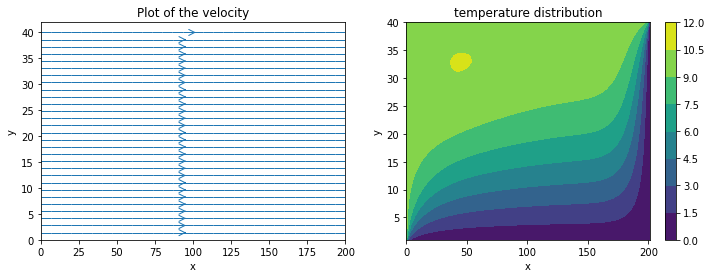

In [14]:
#PLOTTING THE RESULTS
#must pay attention that we are using a staggered arrangement
#this means that the arrangement used for the scalar CV is different from the one used for the velocity

#define the mesh for the scalar CV
X = np.linspace(0, N_x + 1, N_x + 2); #including BC
Y = np.linspace(1, N_y, N_y);

rect_domain = np.zeros((N_y, N_x + 2));

#define the mesh for the velocity
u_coor = np.linspace(0, N_x, N_x + 1);
v_coor = np.linspace(0, N_y, N_y + 1);

U, V = np.meshgrid(u_coor, v_coor);

U[:, :] = 0;
V[:, :] = 0;
        
#check the notes for the structure
for a in range(0, N_x + 1):
    c = a*N_y;
    for b in range(0, N_y):
        d = c + b;
        U[b + 1, a] = vel_u[0, d];

for a in range(0, N_x):
    c = a*(N_y+1);
    for b in range(0, N_y + 1):
        d = c + b;
        V[b, a + 1] = vel_v[0, d];

#plot the velocity field
fig, axes  = plt.subplots(1, 2, figsize = (12, 4));

gr_vel = axes[0];
gr_temp = axes[1];

gr_vel.streamplot(u_coor, v_coor, U, V, linewidth=1, density=1, arrowstyle='->', arrowsize=1.5);
gr_vel.set_xlabel("x");
gr_vel.set_ylabel("y");
gr_vel.set_title("Plot of the velocity");

total_scalar_domain = np.c_[inlet_BC, scalar_CV];
total_scalar_domain = np.c_[total_scalar_domain, outlet_BC];

rect_domain[:, :] = 0;

for a in range(0, N_x + 2):
    c = a*N_y;
    for b in range(0, N_y):
        d = c + b;
        rect_domain[b, a] = total_scalar_domain[0, d];
        
temp_distr = gr_temp.contourf(X, Y, rect_domain);
plt.colorbar(temp_distr, ax = gr_temp);
gr_temp.set_xlabel("x");
gr_temp.set_ylabel("y");
gr_temp.set_title("temperature distribution")

plt.savefig("T_e=10-T_w=0-T_b=0-T_t=10_vel_lin=1.jpeg")

dt2 = pd.DataFrame(rect_domain);
dt2.to_excel("T_e=10-T_w=0-T_b=0-T_t=10_vel_lin=1.xlsx")

In [15]:
#the functionality of the code has been validated against the example in Versteeg-Malalasekera at page 139
#same input values were used and the result compared to the analytical solution, which showed a good agreement after cell refinemet
#this probably has to do with the fact that an iterative solution method is used instead of a direct matrix calculation

#the residual/stopping condition must be selected on a case by case basis depending on the type of flow

#the result of such a simulation is strongly dependent upon the size of the velocity, 
#if the velocity is such that multiple cells are traversed in a unit time then the algorithm will yield a fixed value throughout the domain
#that is the upstream value will propagate throughout the domain

#e.g. the case of u = 2